In [8]:
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
from matplotlib_scalebar.scalebar import ScaleBar

In [11]:
def create_river_study_map(river_list, shapefile_base_path, output_folder, output_filename):
    """
    Create a study area map including all desired rivers, with a compass, scale, and background imagery.

    Parameters:
    - river_list: List of river names (each river has a folder and shapefile named after it).
    - shapefile_base_path: Base folder where the subfolders for each river are located.
    - output_folder: Folder where the resulting PDF map will be saved.
    - output_filename: Filename for the saved map (should include '.pdf').

    Output:
    - The function will save a PDF map with the requested rivers to the specified folder.
    """

    # Create an empty list to hold all river GeoDataFrames
    all_rivers_gdfs = []

    # Create a dictionary to store the river name corresponding to each GeoDataFrame
    river_names = {}

    # Loop through each river in the list and load its corresponding shapefile
    for river in river_list:
        shapefile_path = os.path.join(shapefile_base_path, river, f"{river}.shp")
        if os.path.exists(shapefile_path):
            river_gdf = gpd.read_file(shapefile_path)
            
            # Store the river name (from the folder name)
            river_names[river] = river
            
            all_rivers_gdfs.append(river_gdf)
        else:
            print(f"Shapefile for {river} not found at {shapefile_path}")

    # Concatenate all the individual river GeoDataFrames into one
    if all_rivers_gdfs:
        all_rivers_gdf = pd.concat(all_rivers_gdfs, ignore_index=True)
    else:
        print("No valid river shapefiles found. Exiting function.")
        return

    # Set up the plot
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plot the rivers, making the lines bold and dark blue
    all_rivers_gdf.plot(ax=ax, linewidth=2, color='darkblue', label="Rivers")

    # Add labels for each river using the directory name (river)
    for river_name, river_gdf in zip(river_list, all_rivers_gdfs):
        # Get the centroid of the geometry to place the label
        for idx, row in river_gdf.iterrows():
            centroid = row.geometry.centroid
            plt.annotate(river_name, xy=(centroid.x, centroid.y), xytext=(3, 3), 
                         textcoords="offset points", fontsize=8, color="black")

    # Add background satellite imagery
    ctx.add_basemap(ax, crs=all_rivers_gdf.crs.to_string(), source=ctx.providers.Esri.WorldImagery)

    # Add a compass rose
    compass_x, compass_y = 0.95, 0.05  # Position in axes coordinates
    ax.annotate('N', xy=(compass_x, compass_y), xytext=(compass_x, compass_y + 0.05),
                arrowprops=dict(facecolor='black', width=5, headwidth=10),
                ha='center', va='center', fontsize=12, xycoords='axes fraction')

    # Add a scale bar in meters
    scalebar = ScaleBar(1, location='lower left')  # 1 pixel = 1 meter at zoom level
    ax.add_artist(scalebar)

    # Remove axis for a cleaner map
    ax.set_axis_off()

    # Save the map as a PDF in the output folder
    output_path = os.path.join(output_folder, output_filename)
    plt.savefig(output_path, dpi=300, bbox_inches='tight', format='pdf')

    print(f"Map saved to {output_path}")

CRSError: The WKT could not be parsed. OGR Error code 6

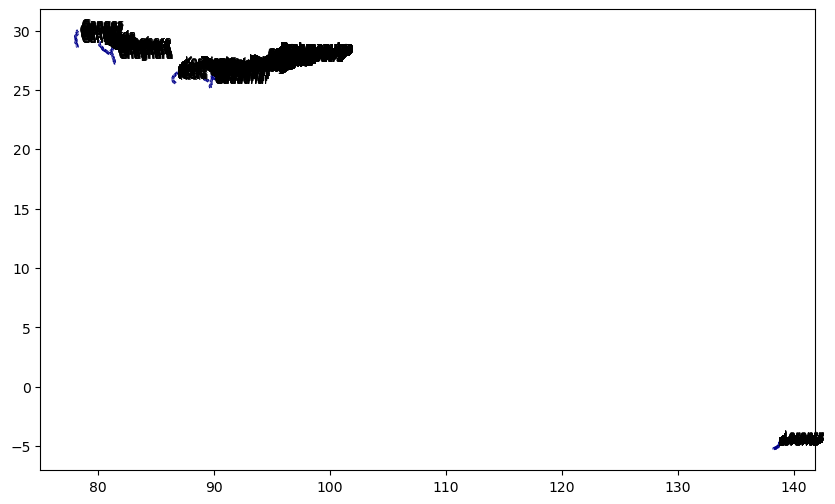

In [12]:
create_river_study_map(
    river_list=["Ganges", "Sarda", "Ghaghara", "Koshi", "Teesta", "Gadadhar", "Beki", "Kameng", "Subansiri", "Brahmaputra", "Lorentz"],
    shapefile_base_path="C:/Users/huckr/Desktop/UCSB/Dissertation/Data/RiverMapping/HydroATLAS/HydroRIVERS/Extracted_Rivers/",
    output_folder="C:/Users/huckr/Desktop/UCSB/Dissertation/Figures/StudyArea_Map/",
    output_filename="studyarea_map.pdf"
)